# Export shock - Decomposition

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Effect on Foreign Economy and Prices](#toc3_1_)    
    - 3.1.1. [Goods market clearing](#toc3_1_1_)    
  - 3.2. [Effect on Production firms, Phillips-curve and Investments](#toc3_2_)    
    - 3.2.1. [Production firms](#toc3_2_1_)    
    - 3.2.2. [Phillips-curve](#toc3_2_2_)    
    - 3.2.3. [Investments](#toc3_2_3_)    
  - 3.3. [Labor market](#toc3_3_)    
  - 3.4. [Government](#toc3_4_)    
  - 3.5. [Effect on consumption](#toc3_5_)    
    - 3.5.1. [Effect on bequests and savings](#toc3_5_1_)    
  - 3.6. [Other](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')            # create baseline model

In [3]:
par = model.par                 # set model parameters
ss = model.ss                   # create namespace for steady state
sol = model.sol                 # create namespace for solution

In [4]:
par.t_b = 0                     # flexible tax rate
par.delta_B = 0                 # flexible tax rate

## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [5]:
Tshock = 50                                             # length of shock
persistence = 0.80**np.arange(Tshock)                   # persistence of shock
shock1 = ['chi']                                        # set shock 1 - shock to chi
shock2 = ['P_F','P_M_C','P_M_G','P_M_I','P_M_X']        # set shock 2 - shock to foreign and import prices
shock_1_size = 0.01                                     #S sze of shock 1 (shock 2 is set to half the size of shock 1)
Modellist = model.multi_shock_model(Tshock,persistence,shock_1_size,shock1,0.5*shock_1_size,shock2)  # find IRFs for the model containing all shocks - as well as the individual shocks

Jacobian calculated in 1.0 mins 17 secs
initial:
t1-t0 = 0.01499 secs
it = 4
    max. abs. error = 2.83e-12
    6.84e-14 in A_R_ini_error
    2.22e-15 in Aq_diff
    1.27e-14 in FOC_capital_agency
    3.73e-14 in FOC_K_ell
    2.83e-12 in mkt_clearing
    5.07e-14 in PC

solve: t1-t0 = 0.16089 secs
evaluate + update: t3-t2 = 0.06596 secs
initial:
t1-t0 = 0.02599 secs
it = 3
    max. abs. error = 6.19e-11
    2.11e-12 in A_R_ini_error
    2.13e-14 in Aq_diff
    4.09e-13 in FOC_capital_agency
    3.71e-11 in FOC_K_ell
    6.19e-11 in mkt_clearing
    7.95e-12 in PC

solve: t1-t0 = 0.16191 secs
evaluate + update: t3-t2 = 0.07296 secs
initial:
t1-t0 = 0.01499 secs
it = 3
    max. abs. error = 2.71e-11
    1.32e-12 in A_R_ini_error
    6.04e-14 in Aq_diff
    3.79e-13 in FOC_capital_agency
    1.04e-11 in FOC_K_ell
    2.71e-11 in mkt_clearing
    1.88e-12 in PC

solve: t1-t0 = 0.15491 secs
evaluate + update: t3-t2 = 0.07696 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

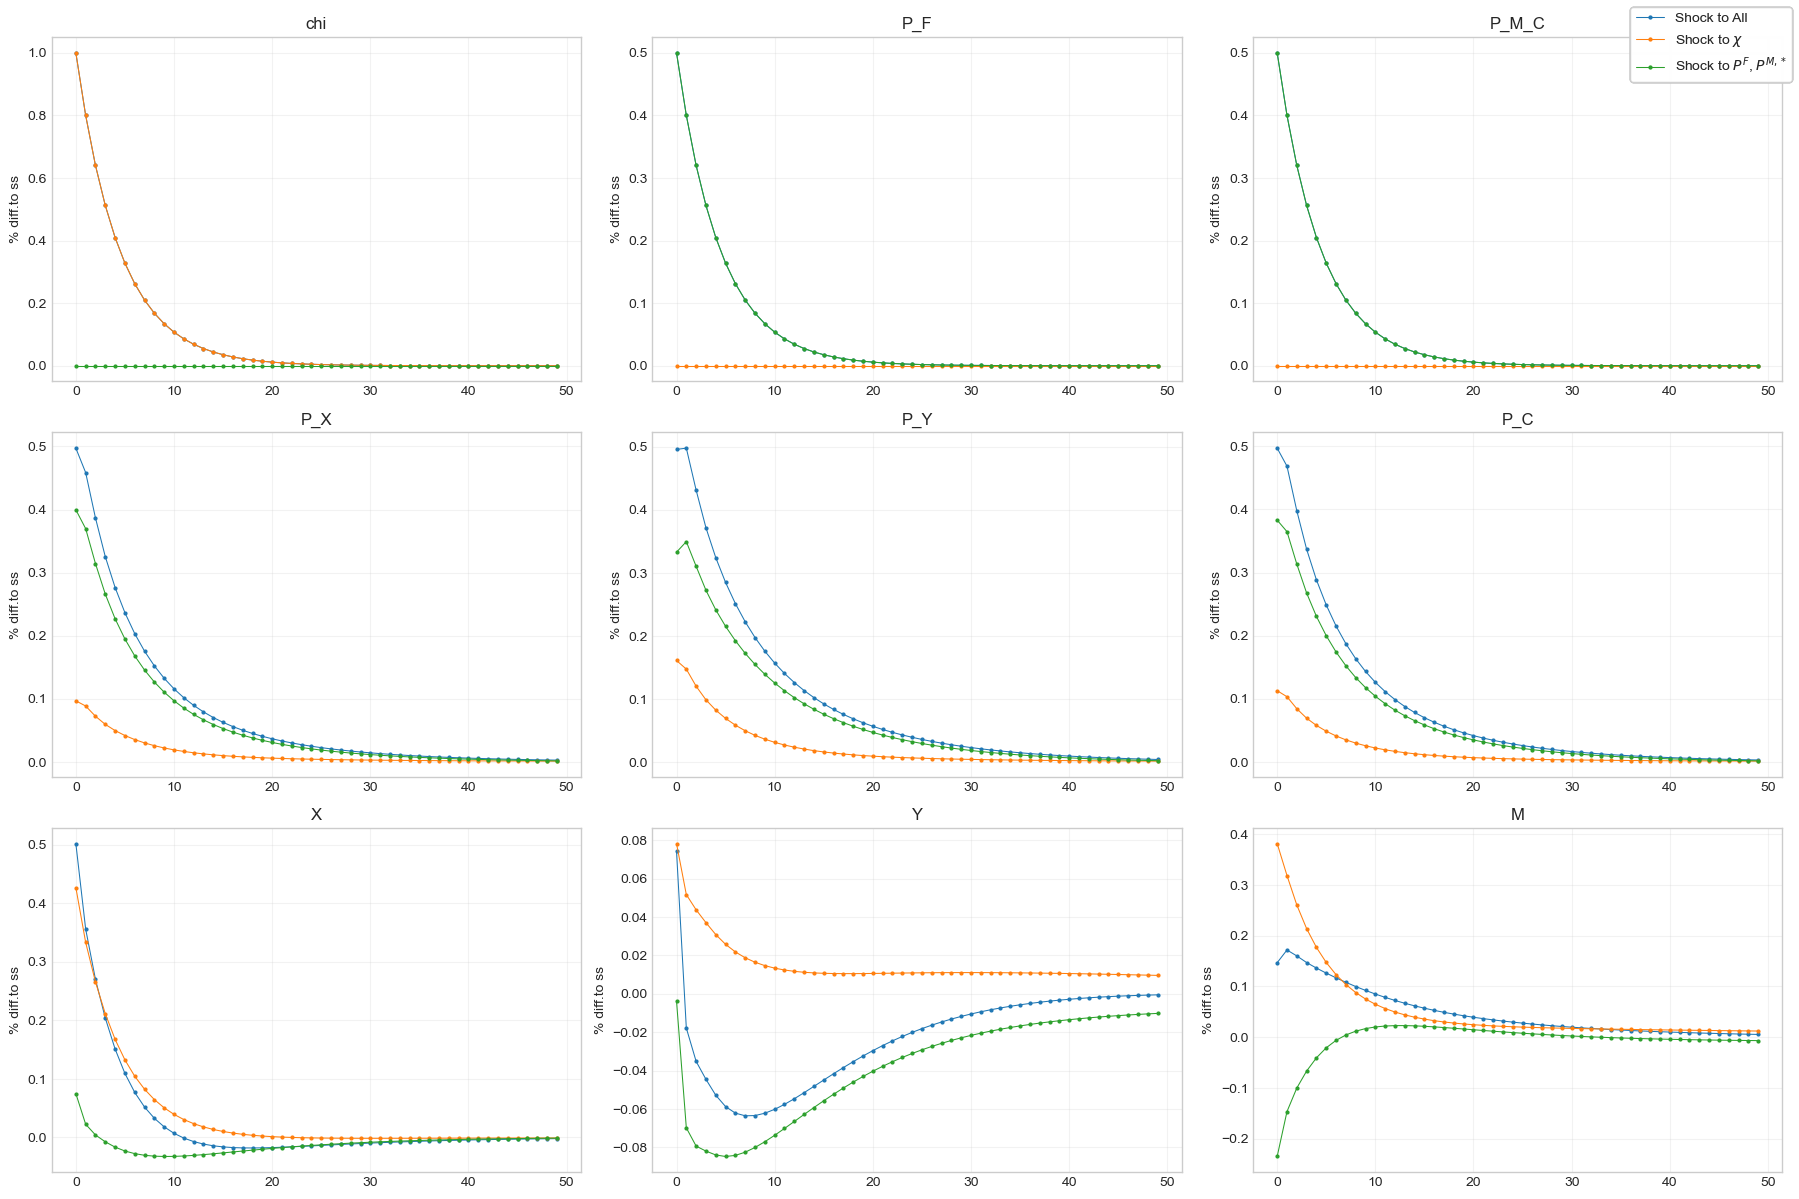

In [6]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C', 'X', 'Y', 'M'])

#### 3.1.1. <a id='toc3_1_1_'></a>[Goods market clearing](#toc0_)

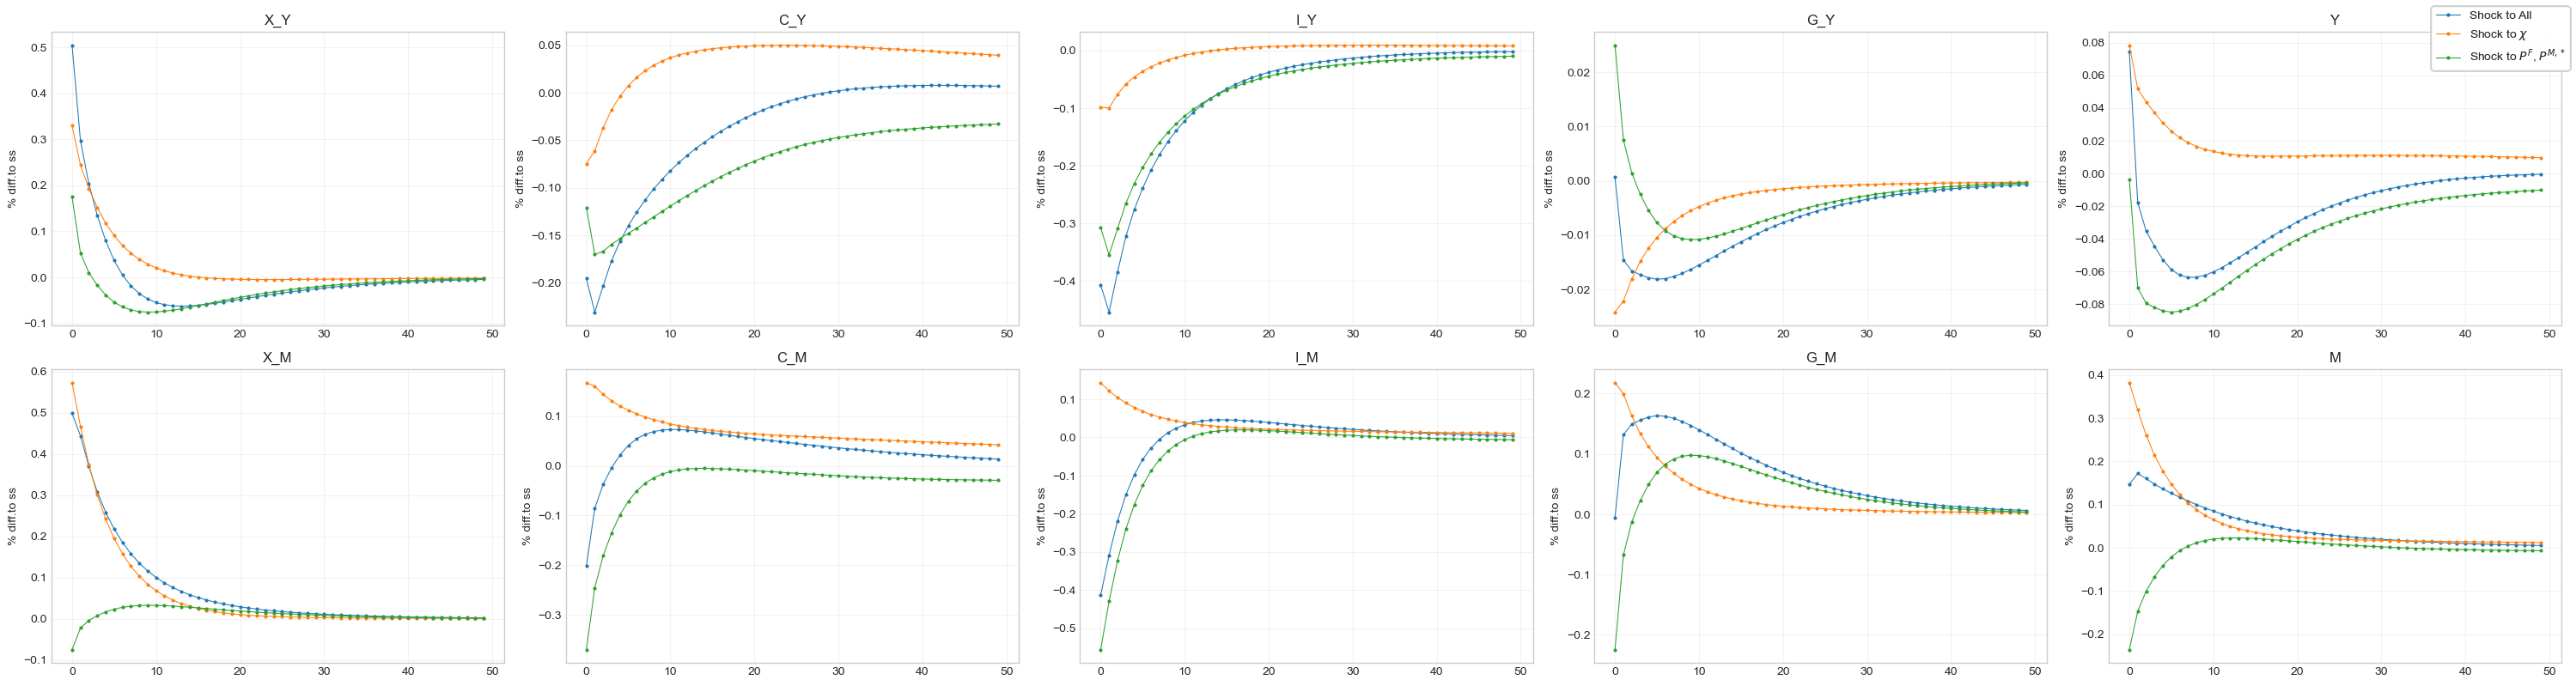

In [7]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['X_Y','C_Y','I_Y','G_Y','Y','X_M','C_M','I_M','G_M','M'], ncol = 5)

### 3.2. <a id='toc3_2_'></a>[Effect on Production firms, Phillips-curve and Investments](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Production firms](#toc0_)

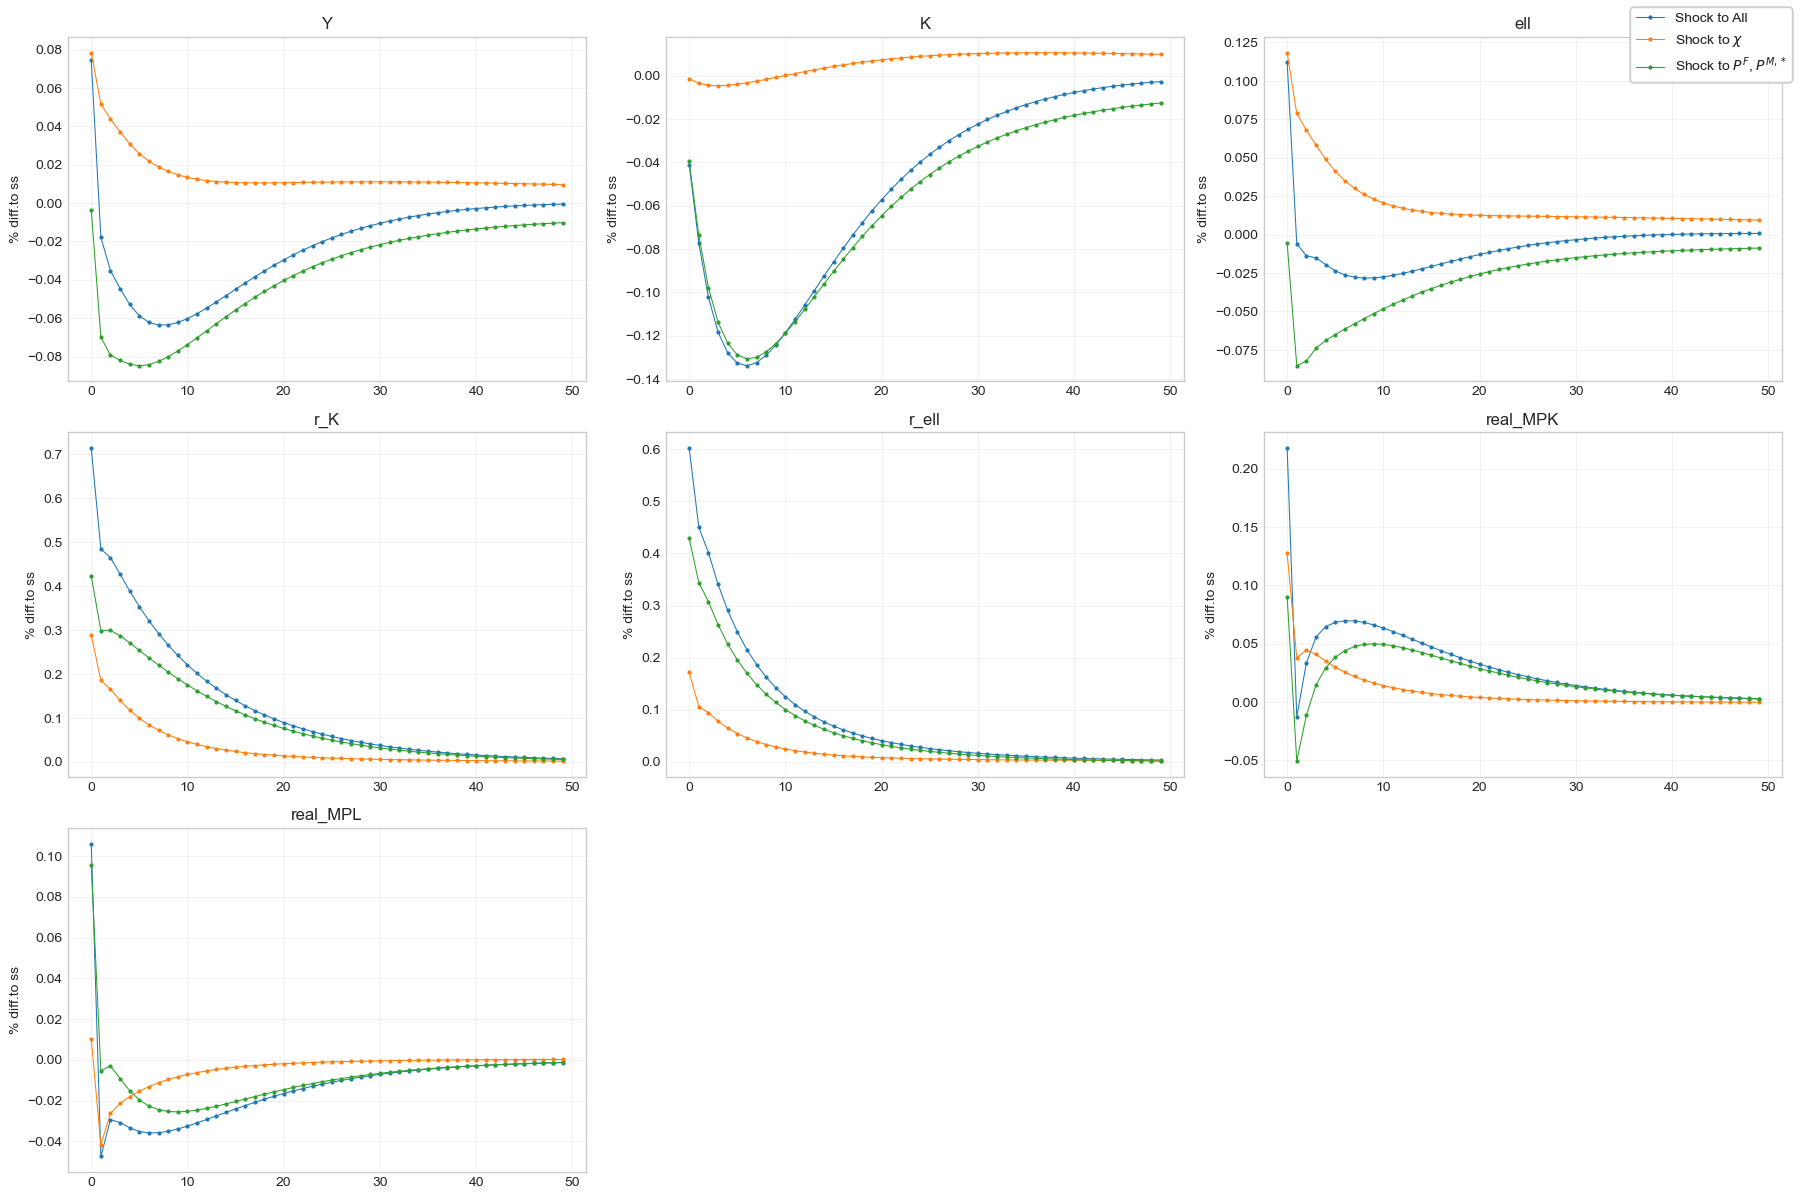

In [8]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['Y','K','ell','r_K','r_ell','real_MPK','real_MPL'])

#### 3.2.2. <a id='toc3_2_2_'></a>[Phillips-curve](#toc0_)

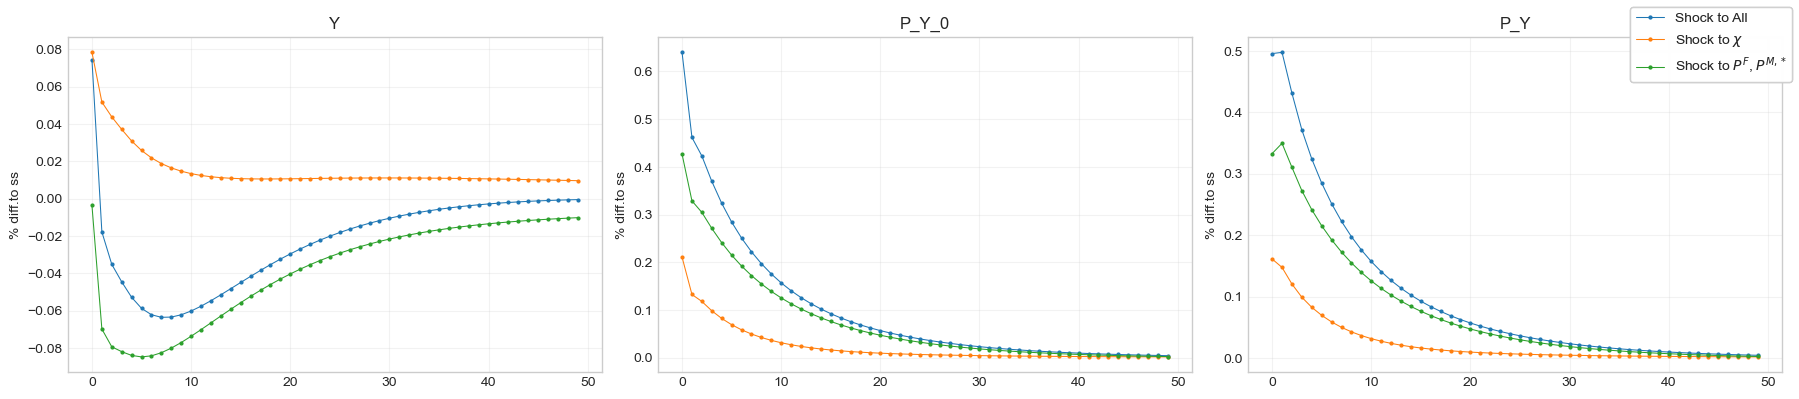

In [9]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['Y','P_Y_0','P_Y'])

#### 3.2.3. <a id='toc3_2_3_'></a>[Investments](#toc0_)

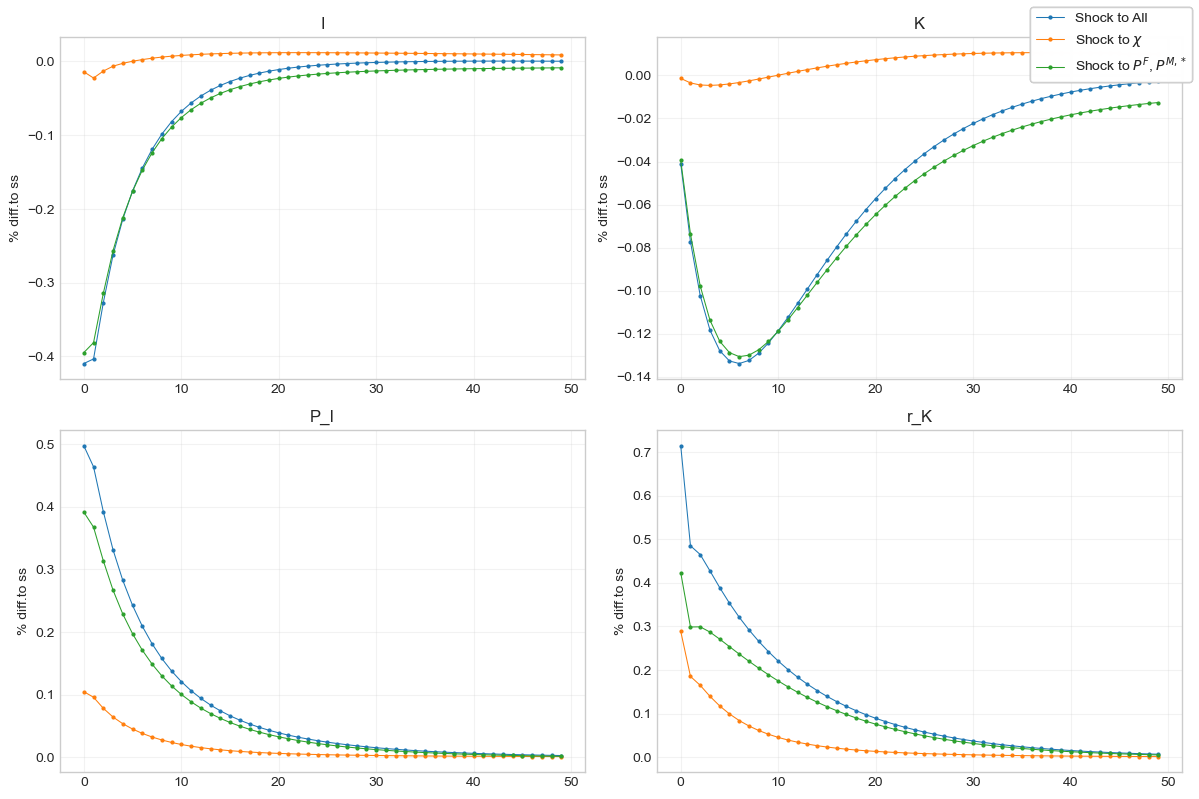

In [10]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['I','K','P_I','r_K'],ncol=2)

### 3.3. <a id='toc3_3_'></a>[Labor market](#toc0_)

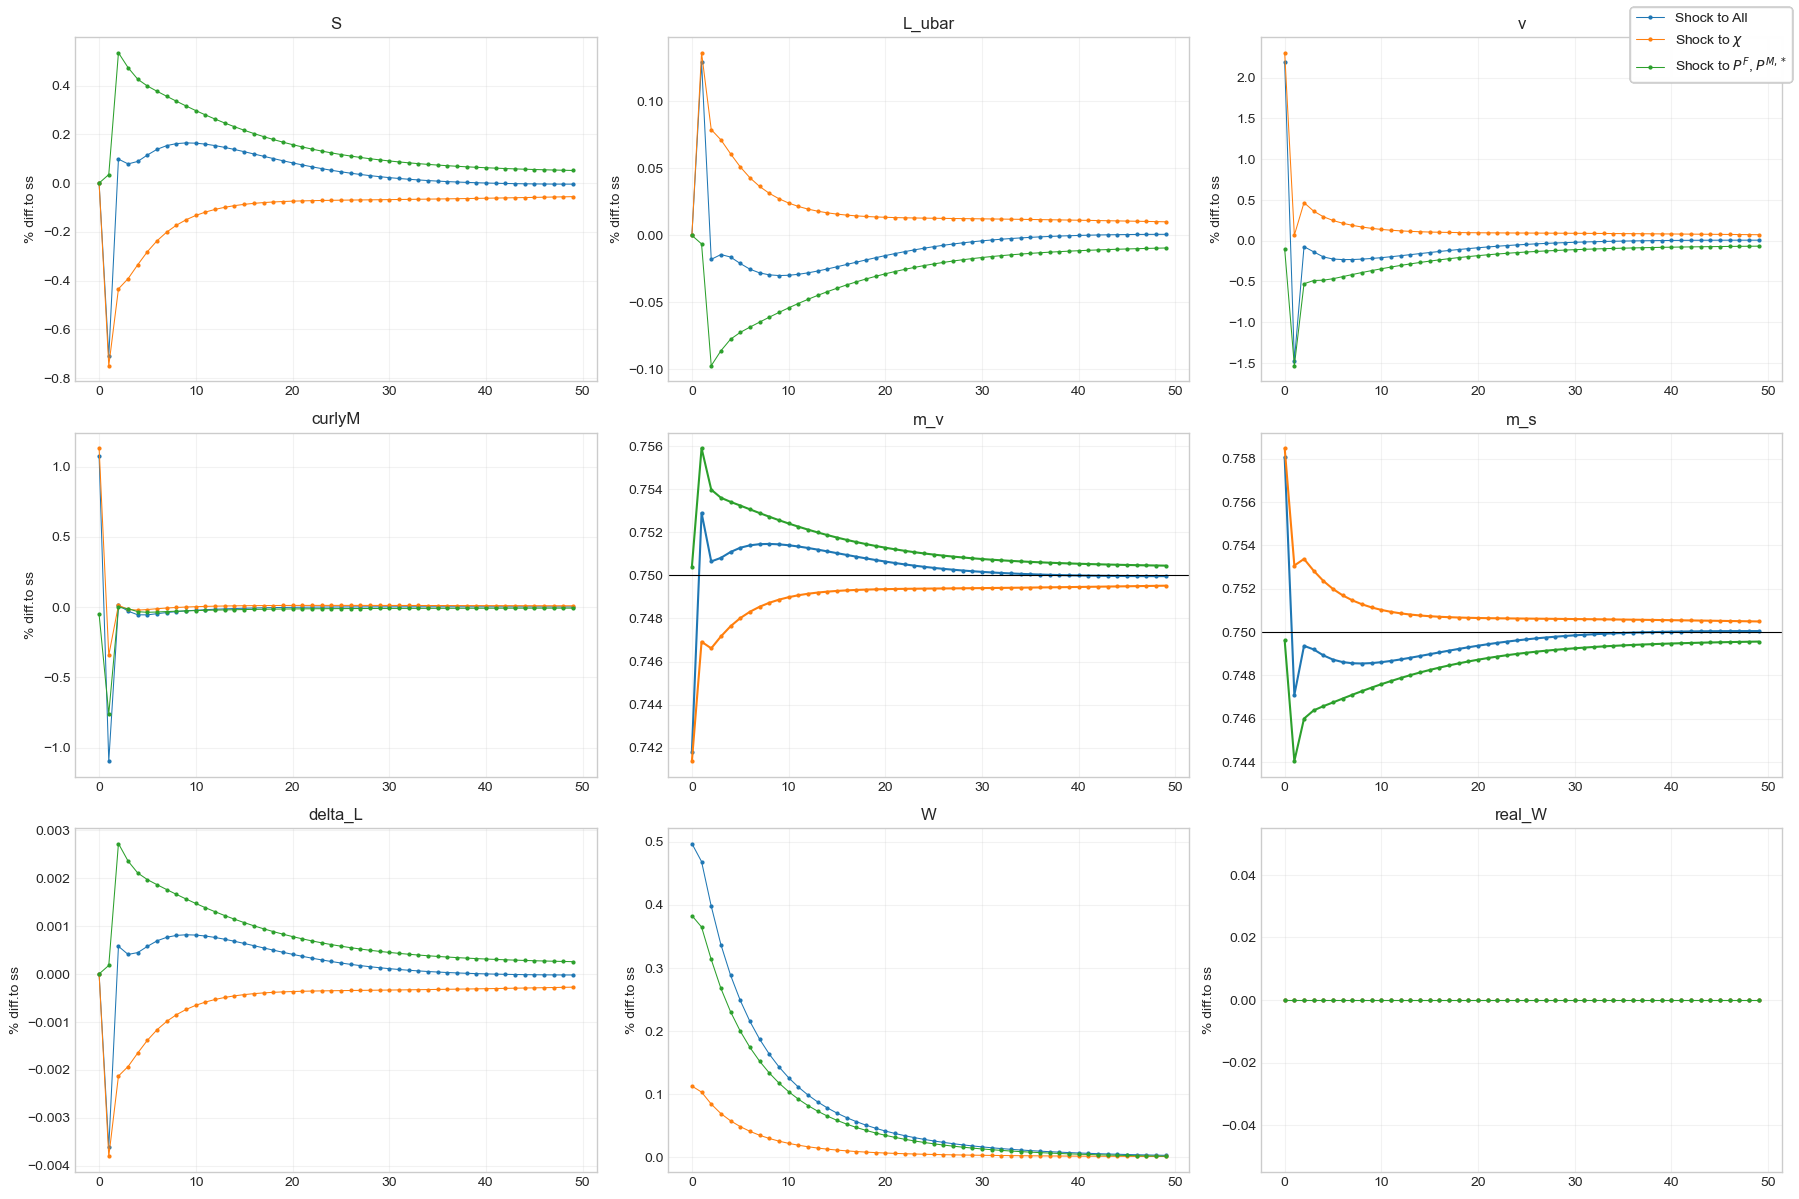

In [11]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 3.4. <a id='toc3_4_'></a>[Government](#toc0_)

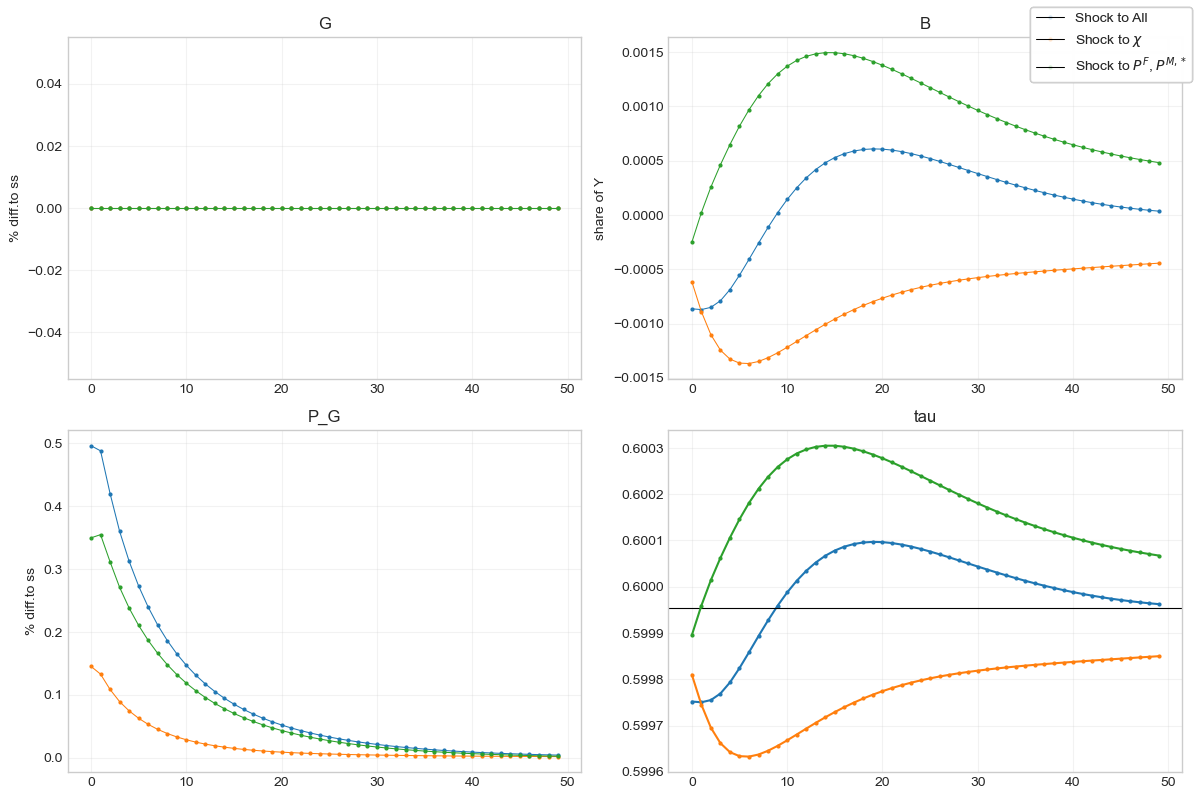

In [12]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'],ncol=2)

### 3.5. <a id='toc3_5_'></a>[Effect on consumption](#toc0_)

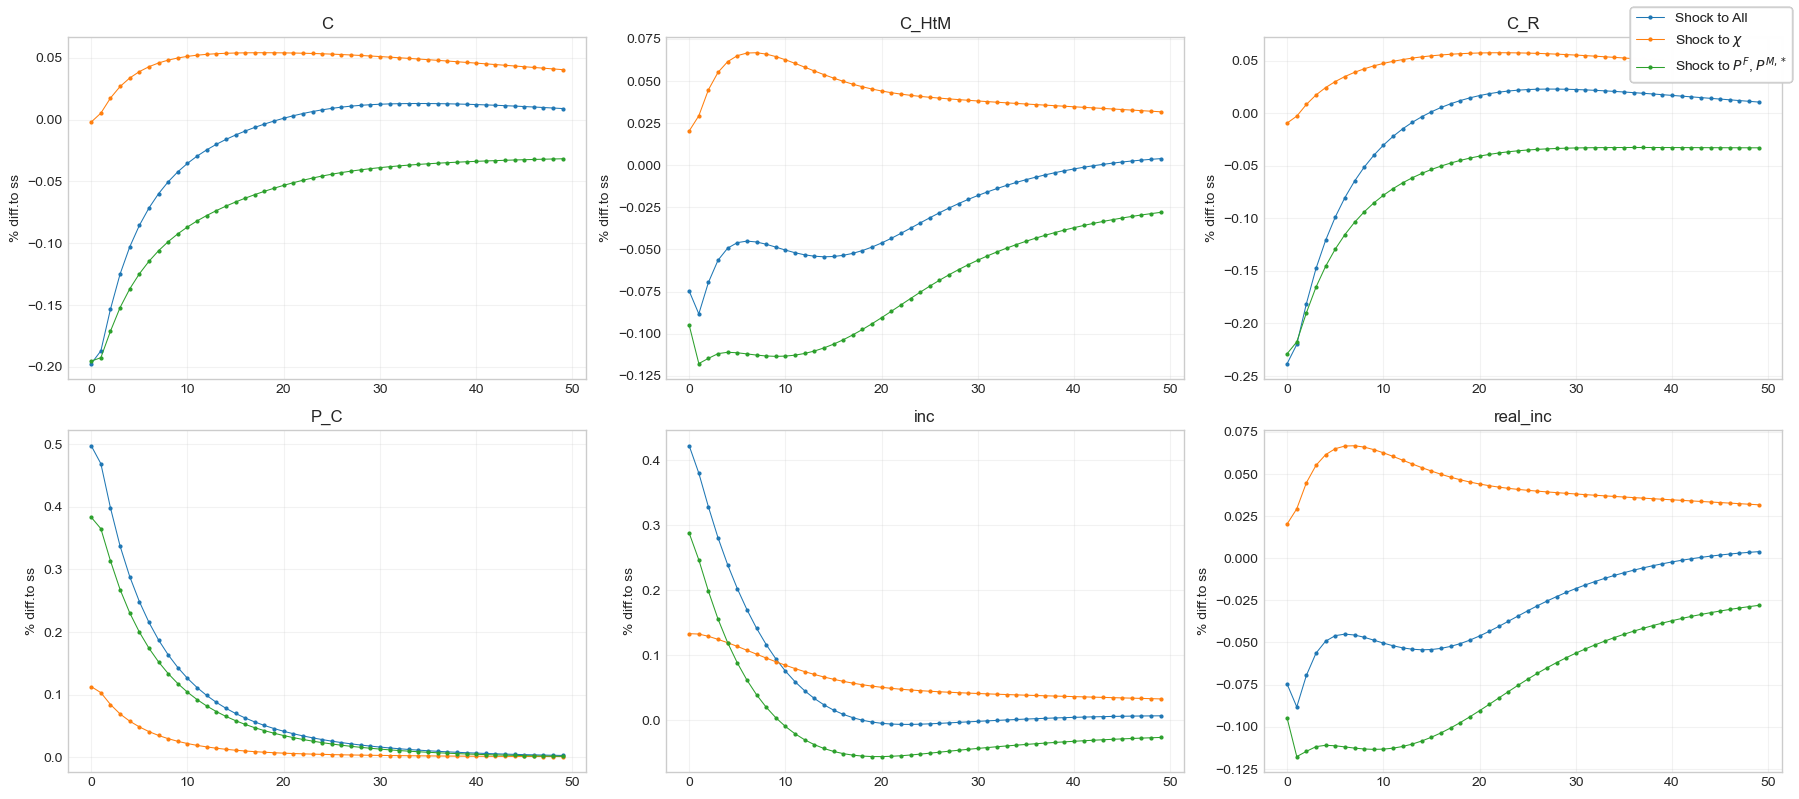

In [13]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3)

#### 3.5.1. <a id='toc3_5_1_'></a>[Effect on bequests and savings](#toc0_)

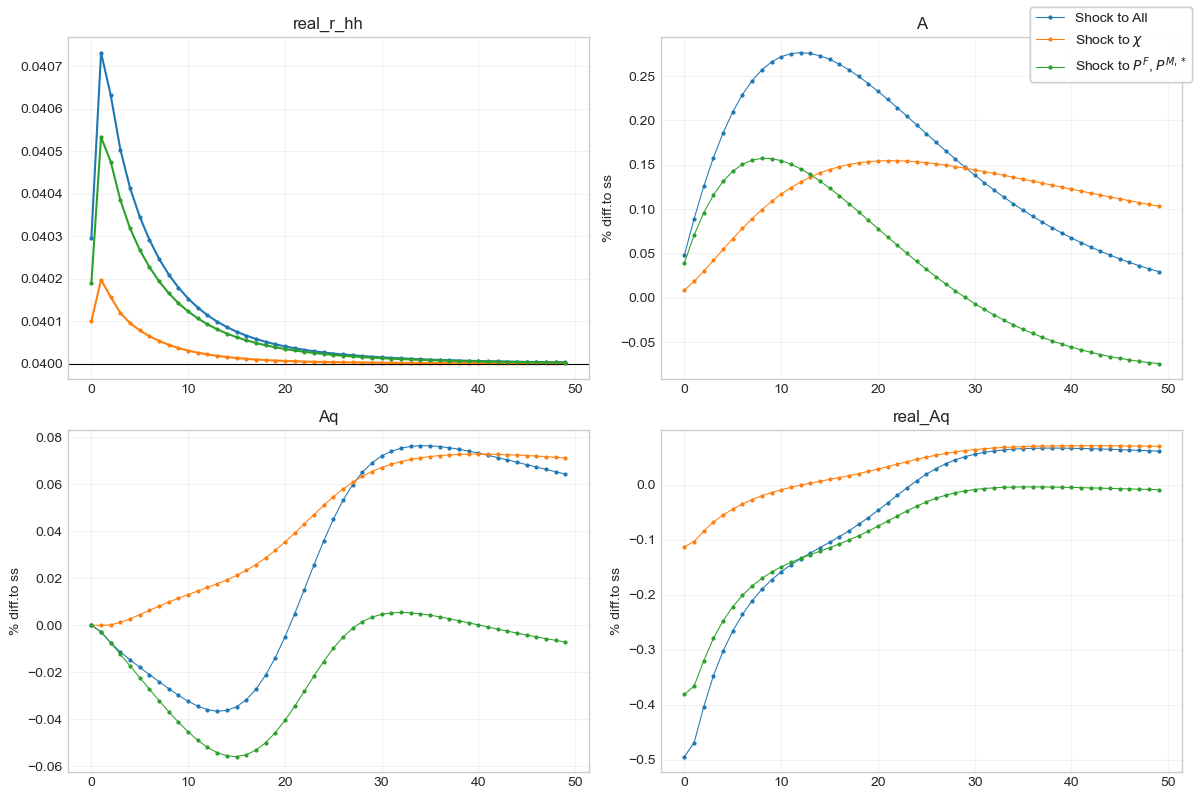

In [14]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['real_r_hh','A','Aq','real_Aq'],abs=['real_r_hh'],ncol=2)